В этом модели буду использовать RandomForestClassifier, так как он явлвяется одним из самых популярных алгоритмов машинного обучения для классификации.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


Читаю файл и сразу вывожу информацию о train.csv, я посмотрел что файлов больше чем обычно.

In [38]:
# Загружаем данные из pandas
data = pd.read_csv('../csv_file/train.csv')
data.info()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_18192\3937482221.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


Следом мне стало интересно сколько же тут пропусков в этих данных и честно говоря я очень удивился, увидев что данных почти нет. Но выход всегда есть!

In [39]:
data.isnull().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64

Хотелось сразу избавиться от большого колличества негодных данных для моей модели. Сделал всё одним кодом, удалил сначала то, что почти пусто и потом удалил дубликаты по "Client_id", так как клиент может несколько раз заходить и его данные могут дублироваться.

In [40]:
threshold = 0.9
print(len(data))
deleate = int(len(data) * (1 - threshold))
df_clean = data.dropna(axis=1,thresh=deleate)
df_clean = df_clean.drop_duplicates(subset=['client_id'])
df_clean

14456


,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,2023-01-01,8294,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,NaN,NaN,NaN,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,0.258007
14431,2022-10-01,4919,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
14434,2023-02-01,8296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,0.257217
14446,2022-10-01,8302,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148


Очень рад, что данных стало намного меньше чем изначально, с этим уже можно и поработать!

In [41]:
df_clean.shape

(4817, 711)

Сразу же хотелось на графике показать сколько данных пустых

<Axes: >

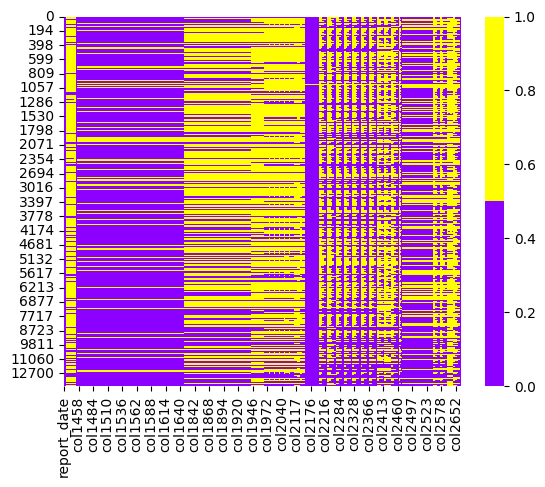

In [42]:
cols = df_clean.columns
#фиолетовые - пропущенные данные, желтые - не пропущенные
colours = ['#8b00ff', '#ffff00']
sns.heatmap(df_clean[cols].isnull(), cmap=sns.color_palette(colours))

Узнаём количество пропусков в каждой колонке и я увидел что 4 колонки полностью заполнены. report_date, client_id, target... и col2666! В нём есть заполненные данные и он отличается от всех остальных колонок в этом dataset.

In [43]:
missing_percentage = df_clean.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
report_date     0.000000
client_id       0.000000
target          0.000000
col476         83.246834
col480         83.246834
                 ...    
col2656        51.152169
col2660        39.505917
col2661        39.505917
col2662        39.505917
col2663         0.000000
Length: 711, dtype: float64


Узнаём по целевой переменной "target" сколько клиентов купит машиноместо и их довольно мало.

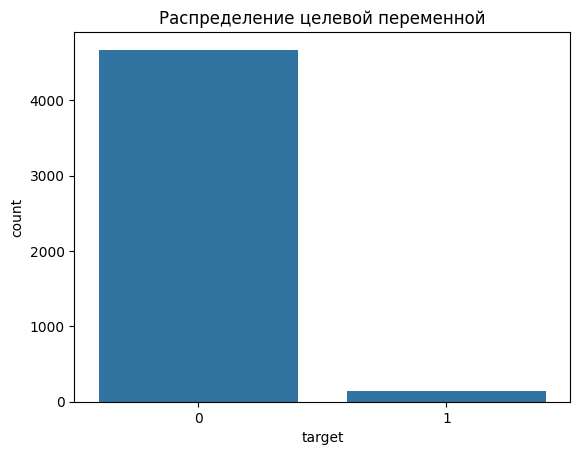

In [44]:
sns.countplot(x='target', data=df_clean)
plt.title('Распределение целевой переменной')
plt.show()

Я с помощью кода узнал сколько столбцов имеют полностью 0, я взял эти колонки и удалил. Так же я удалил все оставшиеся колонки с типом "object".

In [45]:
df_clean = df_clean.drop(columns=['client_id','report_date', 'col520', 'col528', 'col536', 'col544', 'col552', 'col592', 'col600', 'col608', 'col1454', 'col1471', 'col1479', 'col1480', 'col1481', 'col1482', 'col1483', 'col1484', 'col1485', 'col1486', 'col1486', 'col1495', 'col2525', 'col2526', 'col2527', 'col2528', 'col2529', 'col2530', 'col2531','col1519', 'col1877', 'col2519', 'col2532', 'col2533', 'col2534',	'col1520',	'col1521',	'col1522',	'col1525',	'col1527',	'col1528',	'col1529',	'col1530',	'col1531',	'col1532',	'col1533',	'col1534',	'col1535',	'col1536',	'col1537',	'col1538',	'col1539',	'col1540',	'col1541',	'col1542',	'col1543',	'col1544',	'col1545',	'col1546',	'col1547',	'col1548',	'col1549',	'col1550'	,'col1551',	'col1552',	'col1553',	'col1554',	'col1555',	'col1556',	'col1557',	'col1558',	'col1559',	'col1560',	'col1561',	'col1562',	'col1563',	'col1564',	'col1565',	'col1566',	'col1567',	'col1568',	'col1569',	'col1570',	'col1571',	'col1572',	'col1573',	'col1574',	'col1575',	'col1576',	'col1577',	'col1578',	'col1579',	'col1580',	'col1581',	'col1582',	'col1583',	'col1584',	'col1585',	'col1586',	'col1587',	'col1588',	'col1589',	'col1590',	'col1591',	'col1592',	'col1593',	'col1594',	'col1595',	'col1596',	'col1597',	'col1598',	'col1599',	'col1600',	'col1601',	'col1602',	'col1603',	'col1604',	'col1605',	'col1606',	'col1607',	'col1608',	'col1609',	'col1610',	'col1611',	'col1612',	'col1613'	,'col1614',	'col1615',	'col1616',	'col1617',	'col1618',	'col1619',	'col1620'	,'col1621',	'col1622',	'col1623',	'col1624',	'col1625',	'col1626',	'col1627',	'col1628',	'col1629',	'col1630',	'col1631',	'col1632',	'col1633',	'col1634'	,'col1635',	'col1636'	,'col1637',	'col1638'	,'col1639',	'col1640',	'col1641',	'col1642',	'col1643'	,'col1644',	'col1645',	'col1646',	'col1863',	'col1871',	'col1872',	'col1873',	'col1874',	'col1875',	'col1876',
                                  'col1878',	'col1879',	'col1880',	'col1881',	'col1882',	'col1883',	'col1884',	'col1885',	'col1886',	'col1887',	'col1888',	'col1889',	'col1890',	'col1891',	'col1892',	'col1893',	'col1894',	'col1911',	'col1912',	'col1913',	'col1914',	'col1915',	'col1916',	'col1917',	'col1918'	,'col2503',	'col2504',	'col2505',	'col2506',	'col2507',	'col2508',	'col2509',	'col2510',	'col2511',	'col2512',	'col2513',	'col2514',	'col2515',	'col2516',	'col2517',	'col2518','col2520'	,'col2521',	'col2522',	'col2523',	'col2524'])


In [46]:
# threshold = 0.1


# low_corr_columns = df_clean.columns[(df_clean.abs() < threshold).all()]
# low_corr_data = df_clean[low_corr_columns]
# low_corr_data

Все оставшиеся данные заполнил медианой.

In [47]:
df_clean = df_clean.fillna(df_clean.median())

In [48]:
# df_clean.to_csv('train_edit.csv', index=False)

Неплохой результат!

In [49]:
df_clean.head()

,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,0,59.8983,55.7483,57.818451,59.5791,59.898300,37.6171,30.2618,32.59973,30.2618,...,6850000.0,6800000.0,6830725.0,6500000.0,6443284.0,6491750.0,6500000.0,6435100.0,6495012.5,0.256261
1,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,37.61710,37.6171,...,6850000.0,6800000.0,6830725.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,0,59.8983,55.7483,57.818451,59.5791,59.898300,37.6171,30.2618,32.59973,30.2618,...,6850000.0,6800000.0,6830725.0,6500000.0,6443284.0,6491750.0,6500000.0,6435100.0,6495012.5,0.256261
3,0,59.8983,55.7483,57.818451,59.5791,59.898300,37.6171,30.2618,32.59973,30.2618,...,6850000.0,6800000.0,6830725.0,6500000.0,6443284.0,6491750.0,6500000.0,6435100.0,6495012.5,0.258682
4,0,59.8983,55.7483,57.818451,59.5791,59.898300,37.6171,30.2618,32.59973,30.2618,...,6850000.0,6800000.0,6830725.0,6500000.0,6443284.0,6491750.0,6500000.0,6435100.0,6495012.5,0.254164


Теперь уже обрабатываем valid_filtred.csv из него я уже удалил столбцы которые были удалены и в train.csv.

In [50]:
# Загружаем данные из pandas
df = pd.read_csv('valid_filtred.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 500 entries, target to col2663
dtypes: float64(498), int64(2)
memory usage: 13.9 MB


Столбцов столько же сколько и в train.csv

In [51]:
df.shape

(3642, 500)

Узнаём процент пропусков в каждой колонке... могло быть и хуже.

In [52]:
missing_percentage = df.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
target      0.000000
col476     77.457441
col480     77.457441
col484     77.457441
col488     77.457441
             ...    
col2656    71.499176
col2660    35.145524
col2661    35.145524
col2662    35.145524
col2663     0.000000
Length: 500, dtype: float64


Тут я особо ничего не удалял, разве только столбцы чтобы были одинаковые у обоих файлов. Заполнил медианой.

In [53]:
df_clean = df.fillna(df.median())

Славно.

In [54]:
df_clean.head(500)

,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,0,59.6848,55.7483,55.864866,55.7483,55.748299,37.6171,30.2618,35.893799,37.6068,...,7848013.0,7704000.0,7808300.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,0,59.8983,59.5791,59.738701,59.5791,59.579102,30.2618,30.1154,30.188601,30.1154,...,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,0,59.6848,55.7483,55.864866,55.7483,55.748299,37.6171,30.2618,35.893799,37.6068,...,7848013.0,7704000.0,7808300.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
3,0,59.6848,55.7483,55.864866,55.7483,55.748299,37.6171,30.2618,35.893799,37.6068,...,7848013.0,7704000.0,7808300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.256261
4,0,59.6848,55.7483,55.864866,55.7483,55.748299,37.6171,30.2618,35.893799,37.6068,...,7848013.0,7704000.0,7808300.0,7737230.5,7603419.5,7687750.0,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,59.8983,48.5855,55.698413,55.7483,55.748299,44.0012,7.7418,36.627633,37.6171,...,7848013.0,7704000.0,7808300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.261486
496,0,59.6848,55.7483,55.864866,55.7483,55.748299,37.6171,30.2618,35.893799,37.6068,...,7848013.0,7704000.0,7808300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.256919
497,0,59.6848,55.7483,55.864866,55.7483,55.748299,37.6171,30.2618,35.893799,37.6068,...,7848013.0,7704000.0,7808300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.256261
498,0,55.7386,55.7386,55.738602,55.7386,55.738602,37.6068,37.6068,37.606800,37.6068,...,7848013.0,7704000.0,7808300.0,7737230.5,7603419.5,7687750.0,5860000.0,5860000.0,5860000.0,0.256600


In [55]:
# df_clean.to_csv('valid_edit.csv', index=False)

Создаём BaseLine с помощью Random Forest Classifier

In [56]:
train_df = pd.read_csv("train_edit.csv")
valid_df = pd.read_csv("valid_edit.csv")
# train_df = pd.read_csv("../AC/trein.csv")
# validation_df = pd.read_csv("../AC/val.csv")

Распределяем данные на обучающую и тестовую выборки

In [57]:
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]

X_val = valid_df.drop(columns=["target"])
y_val = valid_df["target"]

Ставим параметры для модели

In [58]:
param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

Используем GridSearchCV для поиска лучших параметров

In [59]:
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [60]:
# Лучшая модель после поиска
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


Выводим получившиеся результаты

In [61]:
y_prob = best_model.predict_proba(X_val)[:, 1]

#ROC curve
roc_auc = roc_auc_score(y_val, y_prob)
print(f'ROC-AUC на тестовой метрики {roc_auc:.4f}')

#Метрики
y_pred = best_model.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Confusin matrix:', confusion_matrix(y_val, y_pred))
print('Classification report:', classification_report(y_val, y_pred))

ROC-AUC на тестовой метрики 0.7538
Accuracy: 0.9818780889621087
Confusin matrix: [[3576    0]
 [  66    0]]
Classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.00      0.00      0.00        66

    accuracy                           0.98      3642
   macro avg       0.49      0.50      0.50      3642
weighted avg       0.96      0.98      0.97      3642



c:\Users\Vlad\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vlad\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vlad\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Выводим результаты Roc-кривой

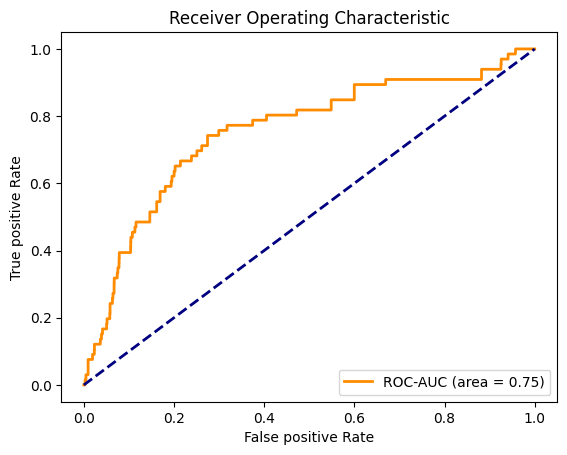

In [62]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()